Supervised learning is the machine learning task of inferring a function from labeled training data.
There are basically two types of tasks in supervised learning: classification and regression.

- Classification: the output variable takes class labels (like object recognition).
- Regression: the output variable takes continuous values (like age).

In this example we start with classification of irises.

In [1]:
from sklearn import datasets
iris = datasets.load_iris()
data = iris.data
print data.shape

(150, 4)


The data we loaded contains 150 observations of irises, each described by 4 features: their sepal and petal length and width. This is a classic dataset used in machine learning for explaining problems like clustering and classification.

For a more complete description, run the next line, which has all the details about the dataset.

In [2]:
print iris.DESCR

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

One quick way to check out the dataset is to plot each of the four features in relation to the others.

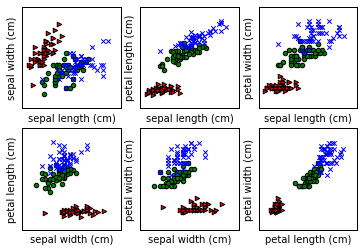

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
x = iris.data
y = iris.target
feature_names = iris.feature_names
pairs = [(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]
for i, (p0, p1) in enumerate(pairs):
    plt.subplot(2, 3, i + 1)
    for t, marker, c in zip(range(3), ">ox", "rgb"):
        plt.scatter(x[y == t, p0], x[y == t, p1], marker=marker, c=c)
    plt.xlabel(feature_names[p0])
    plt.ylabel(feature_names[p1])
    plt.xticks([])
    plt.yticks([])

Our goal is to classify the irises into 3 groups.

As a first approximation, we use only sepal length and sepal width: two dimensional features.

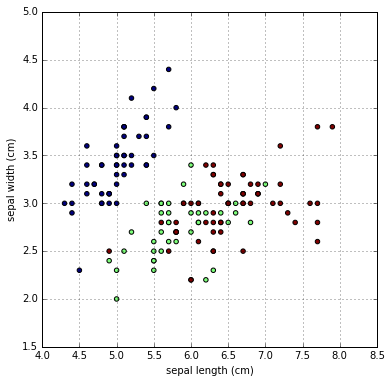

In [4]:
x_2d = x[:, :2]
plt.figure(figsize=(6,6))
plt.scatter(x_2d[:,0], x_2d[:,1], c=y)
plt.grid()
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.show()

There are two kinds of data in the dataset: training and test data. If we use one for training, we can use the other to estimate how accurate our technique will be with new data.

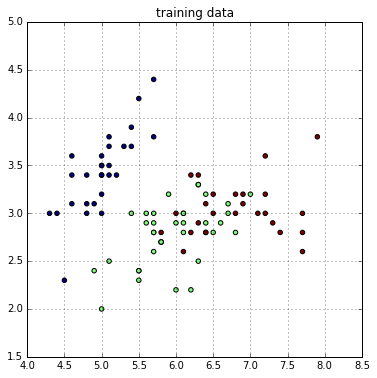

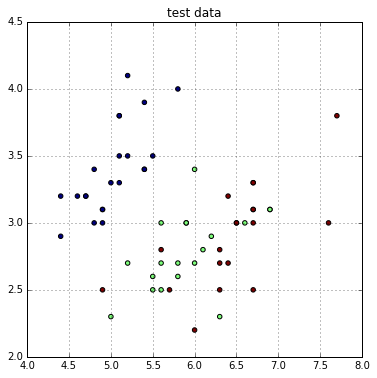

In [5]:
import numpy as np
# split data in train and test data
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_2d, y, test_size=0.4)

data = [(x_train, y_train, 'training data'), (x_test, y_test, 'test data')]
for i in range(2):
    plt.figure(figsize=(6,6))
    plt.scatter(data[i][0][:,0], data[i][0][:,1], c=data[i][1])
    plt.title(data[i][2])
    plt.autoscale()
    plt.grid()
plt.show()

The simplest classifier might be nearest-neighbour: we check for the closest point to a given data point, and use the same category.

In [5]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
prediction = knn.predict(x_test)
print np.count_nonzero(prediction==y_test) / float(prediction.size)

0.8


An accuracy of 80% is a good first step. Let's visualize classification boundaries. code is based on [this example](http://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html).

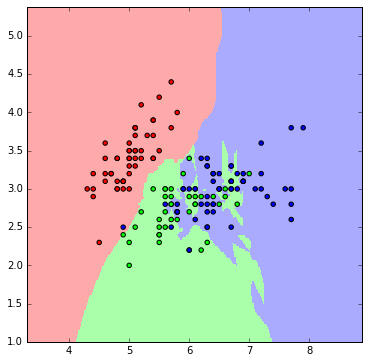

In [6]:
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
h = .02
x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
plt.figure(figsize=(6,6))
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.pcolormesh(xx, yy, z, cmap=cmap_light)
plt.scatter(x[:,0], x[:,1], c=y, cmap=cmap_bold)

Next, we use all of 4 features, but still with the nearest neighbors classifier.

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
prediction = knn.predict(x_test)
print np.count_nonzero(prediction==y_test) / float(prediction.size)

0.966666666667


96% is even better! How about another classifier?

Support vector machines (SVM) are one of the most powerful classifiers, also called a maximum margin classifier.

![](http://scikit-learn.org/stable/_images/plot_separating_hyperplane_001.png)

In [8]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train, y_train)
prediction = svc.predict(x_test)
print np.count_nonzero(prediction==y_test) / float(prediction.size)

1.0


100% accuracy! Both techniques are called in the same way using scikit-learn.

```
training step
 : classifier.fit(train_data, train_label)
 
classification/prediction step
 : classifier.predict(test_data)
```

This means you can easily test several classifiers. The following code is from ["Classifier comparison"](http://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html#example-classification-plot-classifier-comparison-py)

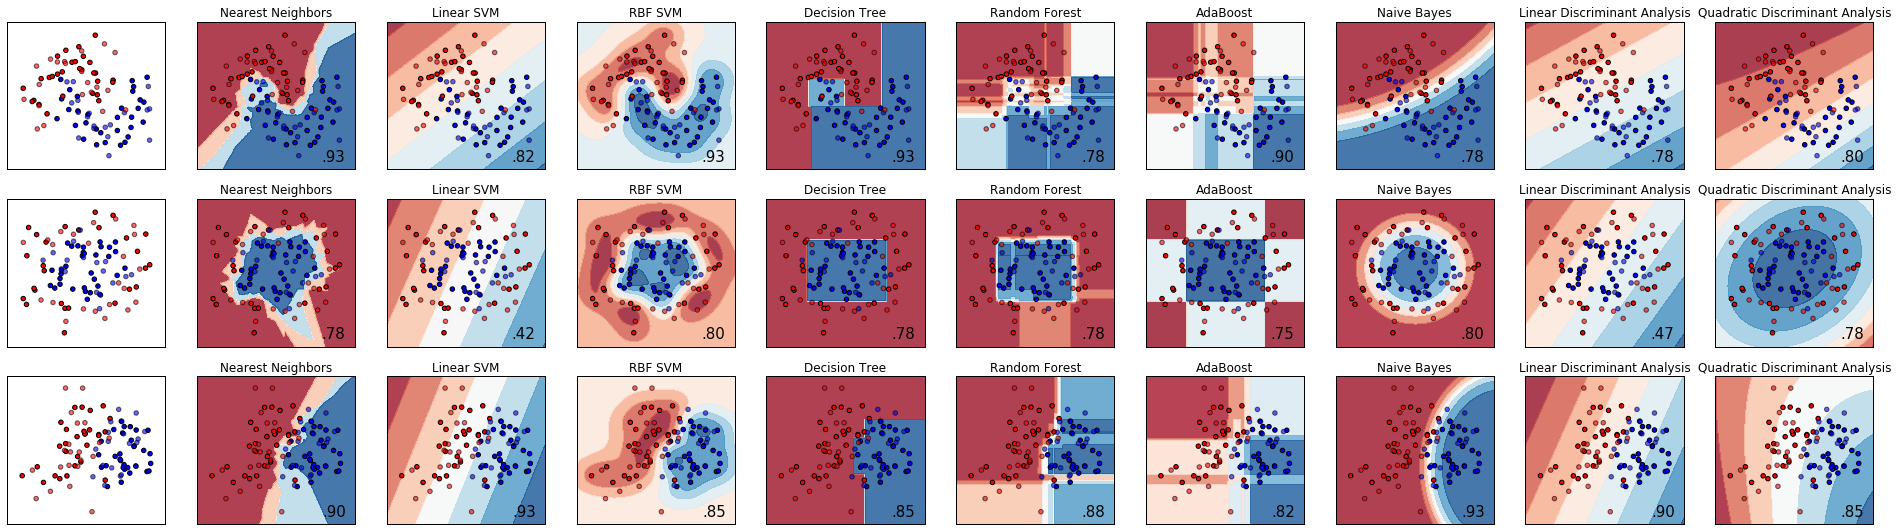

In [9]:
%matplotlib inline
# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Decision Tree",
         "Random Forest", "AdaBoost", "Naive Bayes", "Linear Discriminant Analysis",
         "Quadratic Discriminant Analysis"]
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    AdaBoostClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis()]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds in datasets:
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
    # and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, m_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot also the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
        # and testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

figure.subplots_adjust(left=.02, right=.98)
plt.show()


For a great visualization of SVM check out this video: [SVM with polynomial kernel visualization](https://www.youtube.com/watch?v=3liCbRZPrZA).